In [1]:
import seaborn as sns
import numpy as np
import math

def f(x):
    return math.exp(x) + pow(2, -x) + 2*math.cos(x) - 6

def df(x):
    return math.exp(x) - math.log(2)*pow(2, -x) - 2*math.sin(x)

def df2(x):
    return math.exp(x) + (math.log(2)**2)*pow(2, -x) - 2*math.cos(x)

a, b = 1, 2
p0 = (a + b) / 2
tol = 0.00001

In [2]:
# Newton's method
def newton(f, df, p0, tol):
    
    fpn_hist = []   # track history of |f(pn)|
    error_hist = [] # track history of |pn - p_(n-1)|
    
    pN = p0  # start at p0
    
    while True:
        
        pC = pN - f(pN)/df(pN)
        fpC = abs(f(pC))
        errorC = abs(pC - pN)
        
        fpn_hist.append(fpC)
        error_hist.append(errorC)
        
        pN = pC
        
        if (fpC < tol or errorC < tol):
            break        
    
    return (pN, fpn_hist, error_hist)

In [3]:
# Secant method
def secant(f, p0, tol):
    
    fpn_hist = []   # track history of |f(pn)|
    error_hist = [] # track history of |pn - p_(n-1)|
    
    pN0 = p0  # start at p0
    pN1 = pN0 - f(pN0)/df(pN0)  # compute pN1 via Newton's method with PN0
    # include pN1 in history (effectively an iteration)
    fpn_hist.append(abs(f(pN1)))
    error_hist.append(abs(pN1 - pN0))
    
    while True:
        
        f_pN0, f_pN1 = f(pN0), f(pN1)
        pC = pN1 - f_pN1*(pN1 - pN0)/(f_pN1 - f_pN0) # secant method formula
        fpC = abs(f(pC))
        errorC = abs(pC - pN1)
        
        fpn_hist.append(fpC)
        error_hist.append(errorC)
        
        pN0 = pN1
        pN1 = pC
        
        if (fpC < tol or errorC < tol):
            break        
    
    return (pN1, fpn_hist, error_hist)

In [4]:
# Modified Newton's method
def modNewton(f, df, df2, p0, tol):
    
    fpn_hist = []   # track history of |f(pn)|
    error_hist = [] # track history of |pn - p_(n-1)|
    
    pN = p0  # start at p0
    
    while True:
        
        f_pN, df_pN, df2_pN = f(pN), df(pN), df2(pN)
        pC = pN - f_pN*df_pN /(df_pN**2 - f_pN*df2_pN)
        fpC = abs(f(pC))
        errorC = abs(pC - pN)
        
        fpn_hist.append(fpC)
        error_hist.append(errorC)
        
        pN = pC
        
        if (fpC < tol or errorC < tol):
            break        
    
    return (pN, fpn_hist, error_hist)

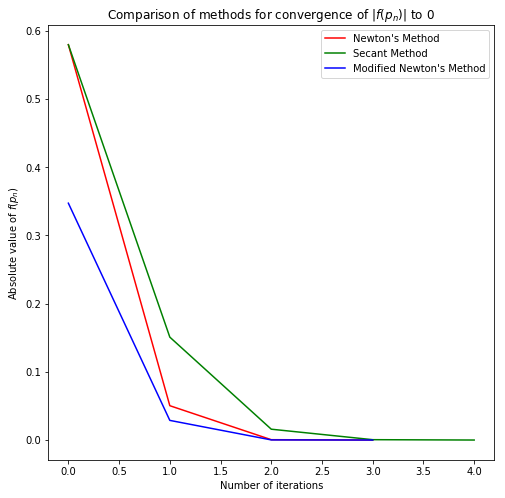

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

newtonP, newton_fpn_hist, newton_error_hist = newton(f, df, p0, tol)
secantP, secant_fpn_hist, secant_error_hist = secant(f, p0, tol)
modNewtonP, modNewton_fpn_hist, modNewton_error_hist = modNewton(f, df, df2, p0, tol)

plt.plot(newton_fpn_hist, color = "red", label = "Newton's Method")
plt.plot(secant_fpn_hist, color = "green", label = "Secant Method")
plt.plot(modNewton_fpn_hist, color = "blue", label = "Modified Newton's Method")
plt.xlabel('Number of iterations')
plt.ylabel('Absolute value of $f(p_n)$')
plt.title('Comparison of methods for convergence of $|f(p_n)|$ to $0$')
plt.legend();

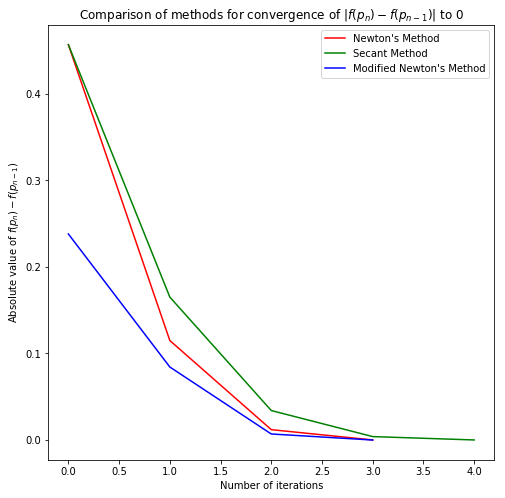

In [6]:
plt.plot(newton_error_hist, color = "red", label = "Newton's Method")
plt.plot(secant_error_hist, color = "green", label = "Secant Method")
plt.plot(modNewton_error_hist, color = "blue", label = "Modified Newton's Method")
plt.xlabel('Number of iterations')
plt.ylabel('Absolute value of $f(p_n) - f(p_{n-1})$')
plt.title('Comparison of methods for convergence of $|f(p_n) - f(p_{n-1})|$ to $0$')
plt.legend();

In [7]:
# Problem 4

def g(x):
    return 1 + math.exp(-x)

p0 = 1
tol = 0.00001

In [30]:
# Standard fixed point iteration
def fpIteration(g, p0, tol):
    
    hist = [] # error history
    
    pN = p0
    
    # iterating
    while True:
        pC = g(pN)
        error = abs(g(pN) - pN) < tol
        hist.append(error)
        pN = pC
        
        if (error < tol):
            break
        
    return [pN, hist]

In [53]:
# Aitken's method
def aitken(g, p0, tol):
    
    hist = [] # error history
    
    # setting up initial variables
    pN = g(p0)   # p_n
    pN1 = g(pN) # p_n+1
    pN2 = g(pN1) # p_n+2
    
    # adding error for pN, pN1 and pN2 (for fair comparison)
    hist.append(abs(g(pN) - pN))
    hist.append(abs(g(pN1) - pN1))
    hist.append(abs(g(pN2) - pN2))
    
    # iterating
    while True:

        pNhat = pN - ((pN1 - pN)**2)/(pN2 - 2*pN1 + pN)
        error = abs(g(pNhat) - pNhat)
        hist.append(error)
        
        pN = pN1
        pN1 = pN2
        pN2 = g(pN2)
        
        if (error < tol):
            break
        print(error)
    
    return [pN2, hist]
    

In [54]:
# Steffensen's method
def steffensen(g, p0, tol):
    
    hist = [] # error history
    
    pN = p0
    
    while True:
        pN1 = g(pN)
        error1 = abs(g(pN1) - pN1)
        hist.append(error1)
        if (error1 < tol):
            break
            
        pN2 = g(pN1)
        error2 = abs(g(pN2) - pN2)
        hist.append(error2)
        if (error2 < tol):
            break
        
        pNhat = pN - ((pN1 - pN)**2)/(pN2 - 2*pN1 + pN)
        error3 = abs(g(pNhat) - pNhat)
        hist.append(error3)
        if (error3 < tol):
            break
    
        pN = pNhat
    
    return [pNhat, hist]

0.00029220885436842536
2.2344879403002338e-05


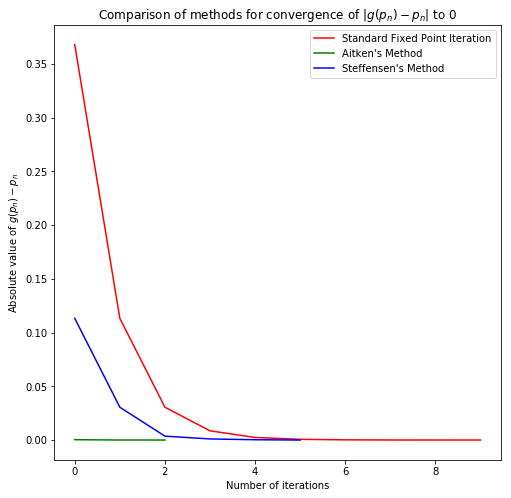

In [55]:
fpIteration_p, fpIteration_hist = fpIteration(g, p0, tol)
aitken_p, aitken_hist = aitken(g, p0, tol)
steffensen_p, steffensen_hist = steffensen(g, p0, tol)

plt.plot(fpIteration_hist, color = "red", label = "Standard Fixed Point Iteration")
plt.plot(aitken_hist, color = "green", label = "Aitken's Method")
plt.plot(steffensen_hist, color = "blue", label = "Steffensen's Method")
plt.xlabel('Number of iterations')
plt.ylabel('Absolute value of $g(p_n) - p_n$')
plt.title('Comparison of methods for convergence of $|g(p_n) - p_n|$ to $0$')
plt.legend();